### 목표 설정
- 0~9까지의 손글씨 숫자를 분류하는 모델을 만들어보자
- 선형 분류모델의 불확실성
- 이미지 데이터의 형태를 파악하고 이해해보자

In [1]:
# 필요한 라이브러리 불러오기
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# 데이터 불러오기
digit_data = pd.read_csv('./data/digit_train.csv')

In [3]:
digit_data.head() 

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
digit_data.shape

(42000, 785)

### EDA(탐색적 데이터 분석)

In [5]:
img0 = digit_data.iloc[ 0, 1:] # 0번째 행의 정답 제외한 모든 컬럼

In [6]:
# img0의 최대값과 최소값 알아보자
print(img0.max())
print(img0.min()) # RGB 255 -white/ 0-black

255
0


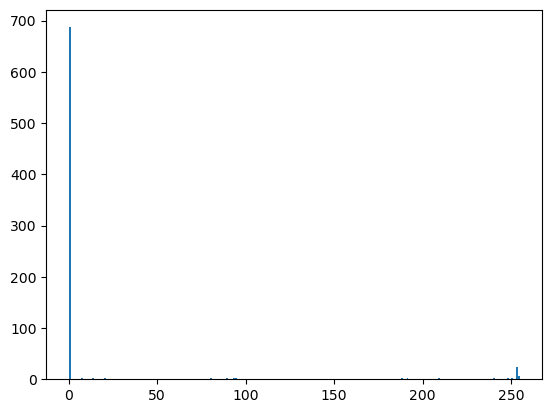

In [7]:
# 데이터의 분포도 확인하기(히스토그램)  = 도수분포표 : 데이터가 얼마나 있는지 표로 확인
plt.hist(img0, bins=255)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

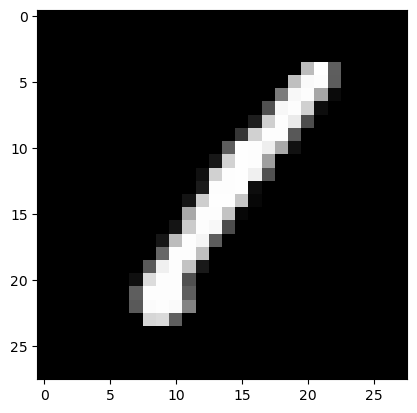

In [8]:
# 이미지로 출력해보기
plt.imshow(img0.values.reshape(28,28), cmap='gray')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

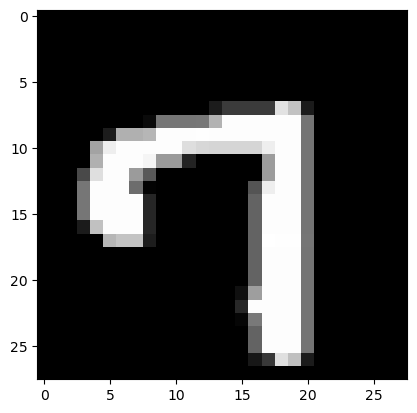

In [9]:
img0 = digit_data.iloc[22222,1:]
# 이미지로 출력해보기
plt.imshow(img0.values.reshape(28,28), cmap='gray')
plt.show

In [10]:
print(digit_data.iloc[22222,0])

7


<function matplotlib.pyplot.show(close=None, block=None)>

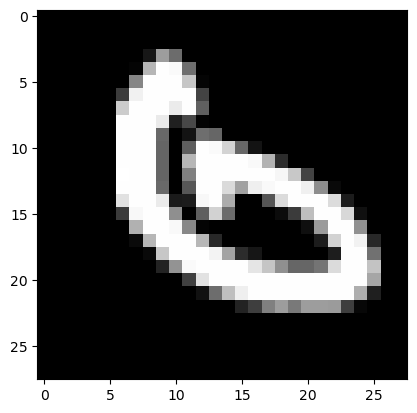

In [11]:
img0 = digit_data.iloc[179,1:]
# 이미지로 출력해보기
plt.imshow(img0.values.reshape(28,28), cmap='gray')
plt.show

In [12]:
print(digit_data.iloc[179,0])

6


### 5000장 추출

In [13]:
X = digit_data.iloc[:5000, 1:]
y = digit_data.iloc[:5000, 0]
print(X.shape)
print(y.shape)

(5000, 784)
(5000,)


In [14]:
# 데이터 분할
# train_test_split, 7:3, 랜덤시드 : 7
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 7 )

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 784)
(1500, 784)
(3500,)
(1500,)


### 모델링(교차검증)

1. KNN
2. Decision Tree
3. Logistic Regression

In [16]:
# 필요한 모델 import(모델은 기본)
# KNN
from sklearn.neighbors import KNeighborsClassifier
# Tree
from sklearn.tree import DecisionTreeClassifier
# Logistic 
from sklearn.linear_model import LogisticRegression

In [17]:
# 모델 객체 생성(모델은 기본 모델)
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
logi_model = LogisticRegression()

In [20]:
# 경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [21]:
# 교차검증
from sklearn.model_selection import cross_val_score
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
logi_model.fit(X_train, y_train)

knn_result = cross_val_score(knn_model, X_train, y_train, cv= 5)
tree_result = cross_val_score(tree_model, X_train, y_train, cv= 5)
logi_result = cross_val_score(logi_model, X_train, y_train, cv= 5)

In [22]:
# 교차검증 결과 출력
print(knn_result)
print(knn_result.mean())
print(tree_result)
print(tree_result.mean())
print(logi_result)
print(logi_result.mean())

[0.92142857 0.91857143 0.90857143 0.93285714 0.91142857]
0.9185714285714285
[0.76428571 0.71142857 0.72857143 0.76       0.73      ]
0.7388571428571429
[0.89285714 0.85714286 0.87428571 0.87428571 0.88142857]
0.8760000000000001


### 스케일링

In [23]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [24]:
# 스케일러 객체 생성
minmax = MinMaxScaler()

In [25]:
# 학습진행
minmax.fit(X_train)

MinMaxScaler()

In [26]:
# 데이터 변환 -> 스케일링 적용
X_train_scale = minmax.transform(X_train)
X_test_scale = minmax.transform(X_test)

(array([570.,  16.,  11.,   8.,   6.,  20.,  15.,   8.,  11., 119.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

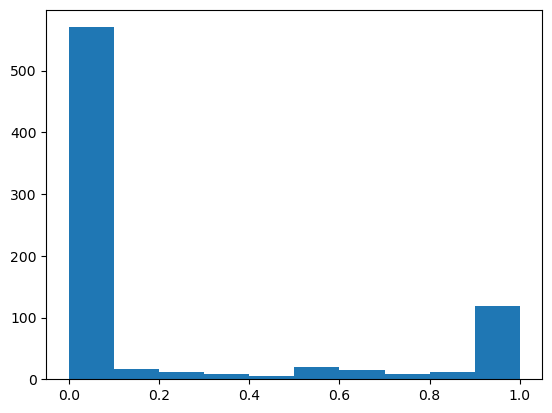

In [27]:
# 스케일링 된 데이터를 시각화 해보자
plt.hist(X_train_scale[0])

In [28]:
# 스케일링을 적용한 데이터로 교차검증을 해보자(KNN, Logistic)
knn_model2 = cross_val_score(knn_model, X_train_scale, y_train, cv=5)
logi_model2 = cross_val_score(logi_model, X_train_scale, y_train, cv=5)

In [29]:
print(knn_model2.mean())
print(logi_model2.mean())

0.9179999999999999
0.8960000000000001


### test score 확인

In [31]:
# 모델 학습 진행(데이터가 어떤 게 들어가야할지 생각하면서 학습을 진행해보자)
# 거리기반 모델은 스케일링을 해주면 좋다.
knn_model.fit(X_train_scale, y_train) # 최근접 이웃 알고리즘 -> 거리기반 -> O
tree_model.fit(X_train, y_train) # 의사결정나무 -> 거리기반 X
logi_model.fit(X_train_scale, y_train) # 거리기반 모델 -> 스케일링한 데이터

LogisticRegression()

In [33]:
# 모델 평가(score 함수 이용)
print (knn_model.score(X_test_scale, y_test))
print (tree_model.score(X_test, y_test))
print (logi_model.score(X_test_scale, y_test))

0.9113333333333333
0.754
0.8846666666666667


### 분류 예측의 불 확실성

In [34]:
# predict_proba : 분류모델의 예측 확률을 보여주는 기능
knn_model.predict_proba(X_test[50:80])

array([[0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.4, 0.2, 0.2],
       [0.2, 0.2, 0. , 0. , 0. , 0.2, 0. , 0. , 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0.6, 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.6, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. ],
       [0.2, 0. , 0.2, 0. , 0. , 0. , 0.2, 0. , 0.2, 0.2],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0.8, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0.2],
       [0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.2, 0. , 0.2, 0. , 0.2, 0.4, 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [0. , 0. , 0. , 0. , 0.4, 0.2, 0. , 0.2, 0. , 0.2],
       [0. , 0. , 0.4, 0. , 0. , 0.2, 0.2, 0. , 0. , 0.2],
       [0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. 

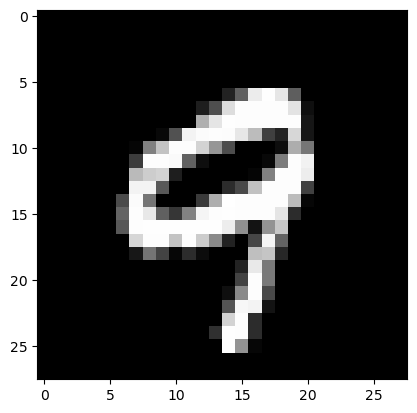

In [35]:
img0 = X_test.iloc[50]
plt.imshow(img0.values.reshape(28,28),cmap='gray' )
plt.show()